<a href="https://colab.research.google.com/github/thihanaung-thnn/MLnotebooks/blob/main/03_iris_logistic_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# EDA

In [3]:
# just for exploratory purpose
df = pd.DataFrame(data = np.hstack((iris['data'], iris['target'].reshape(-1,1))),
                  columns = iris['feature_names']+['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


I will not scale the data during training as they are in similar ranges. 

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

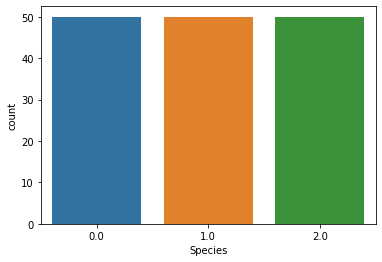

In [6]:
# check for class imbalance 
sns.countplot(data = df, x = df['Species'])

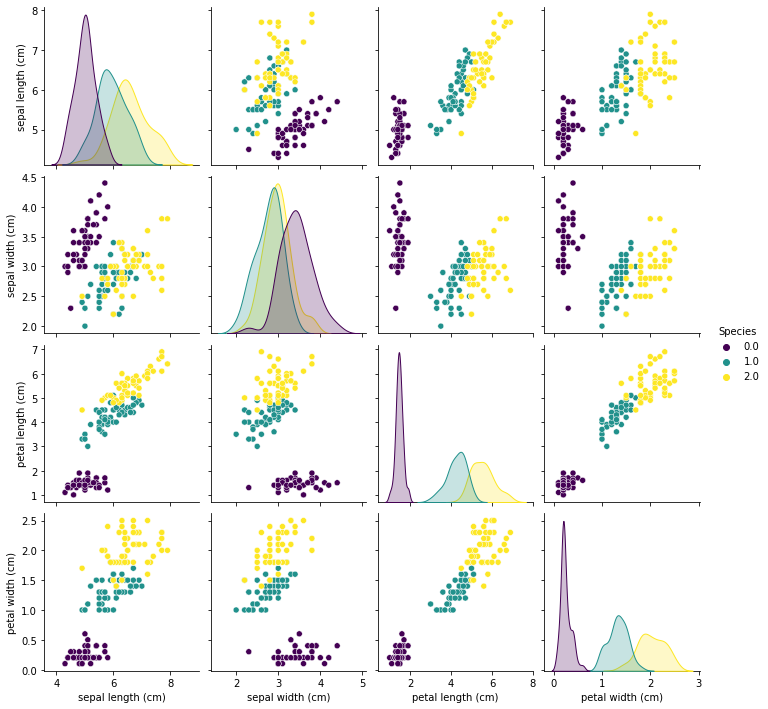

In [7]:
sns.pairplot(df, hue='Species', palette='viridis')

Setosa species is clearly separated from other two species and there is some mixes in other two species. But most of the classification algorithms may work well for this classification. 

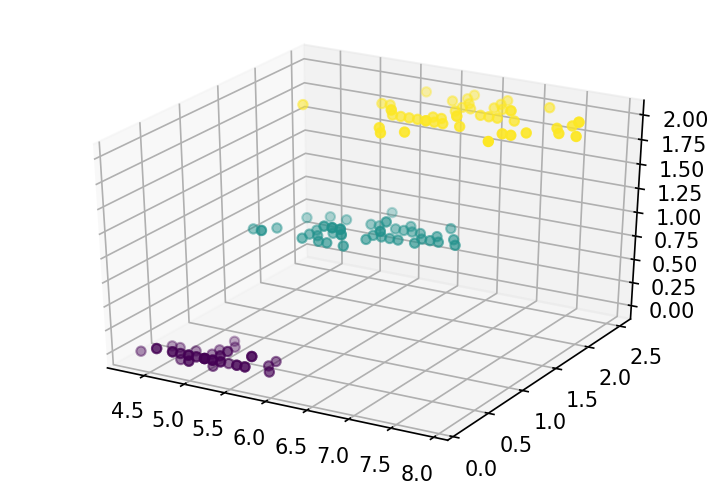

In [8]:
# just for testing
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal length (cm)'], df['petal width (cm)'], df['Species'], c=df['Species'])

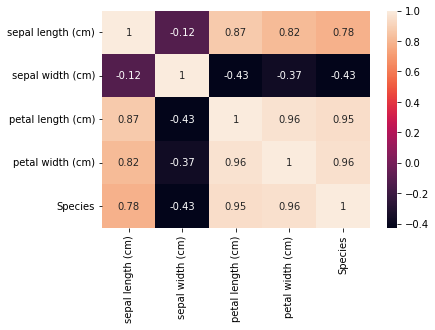

In [9]:
sns.heatmap(df.corr(), annot=True)

Most of the features are highly correlated with species. 

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV 

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], 
                                                    random_state=123, test_size=0.33)

In [11]:
from sklearn.metrics import classification_report, plot_confusion_matrix
def report_model(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50



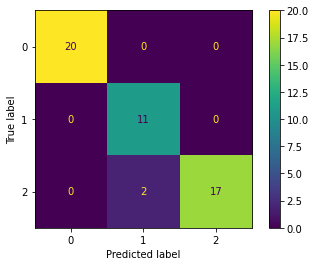

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
report_model(model)

Even default hyperparameters are good fit for this data, only misclassification 2 virginica as versicolor.

In [13]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=4000)
param_grid = {
    'penalty':['l1','l2','elasticnet', 'none'],
    'l1_ratio':np.linspace(0,1,10),
    'C':np.logspace(0,10,10)
}
log_best = GridSearchCV(log_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
log_best.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=4000, multi_class='ovr',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [14]:
log_best.best_params_

{'C': 12.91549665014884, 'l1_ratio': 0.0, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        11
           2       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



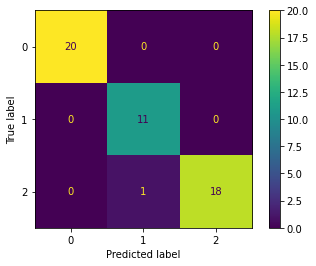

In [15]:
report_model(log_best)

Grid search can classify with only 1 misclassification. But, I think due to the small dataset, it may be random. 